<a href="https://colab.research.google.com/github/JakubJU/1/blob/main/zadanie_3i4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
#Preparing the data

mean = X_train.mean(axis=0)
X_train_n = X_train - mean
std = X_train_n.std(axis=0)
X_train /= std

X_test_n = X_test - mean
X_test_n /= std

meany = y_train.mean(axis=0)
y_train_n = y_train - meany
stdy = y_train_n.std(axis=0)
y_train /= stdy

y_test_n = y_test - meany
y_test_n /= stdy

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train_n)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train_n)
X_test_scaled = scaler.transform(X_test_n)

In [ ]:
#Define, compile and train neural network
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train_n, validation_split=0.2, epochs=150)

Epoch 1/150
11/11 [==============================] - 1s 51ms/step - loss: 1.3333 - mae: 0.8450 - val_loss: 1.0298 - val_mae: 0.7021
Epoch 2/150
11/11 [==============================] - 0s 5ms/step - loss: 1.0700 - mae: 0.7253 - val_loss: 0.9585 - val_mae: 0.6682
Epoch 3/150
11/11 [==============================] - 0s 5ms/step - loss: 0.9241 - mae: 0.6623 - val_loss: 0.8969 - val_mae: 0.6352
Epoch 4/150
11/11 [==============================] - 0s 7ms/step - loss: 0.8089 - mae: 0.6118 - val_loss: 0.8359 - val_mae: 0.6053
Epoch 5/150
11/11 [==============================] - 0s 5ms/step - loss: 0.7967 - mae: 0.5828 - val_loss: 0.7834 - val_mae: 0.5802
Epoch 6/150
11/11 [==============================] - 0s 6ms/step - loss: 0.6587 - mae: 0.5210 - val_loss: 0.7348 - val_mae: 0.5547
Epoch 7/150
11/11 [==============================] - 0s 6ms/step - loss: 0.5970 - mae: 0.4863 - val_loss: 0.6999 - val_mae: 0.5389
Epoch 8/150
11/11 [==============================] - 0s 6ms/step - loss: 0.5303 - 

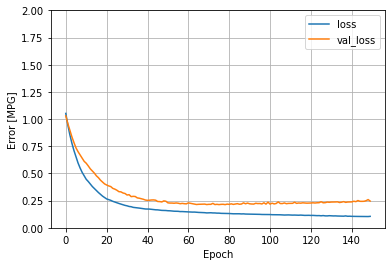

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
results = model.evaluate(X_test_n, y_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model.evaluate(X_train_n, y_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 3ms/step - loss: 28365.4492 - mae: 166.2448
loss test data:  28365.44921875
mse test data:  166.2447509765625
13/13 [==============================] - 0s 1ms/step - loss: 0.1322 - mae: 0.2203
loss train data:  0.13215357065200806
mse train data:  0.22027941048145294


zad4

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop, Adam, Adadelta

from keras.utils.vis_utils import plot_model
from IPython.display import Image 
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping

# install optuna
! pip install optuna

import optuna


batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train0, num_classes)
y_test = keras.utils.to_categorical(y_test0, num_classes)

     |████████████████████████████████| 296kB 6.3MB/s 
     |████████████████████████████████| 81kB 4.4MB/s 
     |████████████████████████████████| 163kB 8.6MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 143kB 10.5MB/s 
     |████████████████████████████████| 112kB 11.0MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=7731e29ccb053e64033c536d0b728135221ac5c69d59055faf4159471c48696a
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip
11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [3]:
N_TRAIN_EXAMPLES = 1000 #3000
N_TEST_EXAMPLES = 10000
x_train = x_train[:N_TRAIN_EXAMPLES]
x_test = x_test[:N_TEST_EXAMPLES]
y_train = y_train[:N_TRAIN_EXAMPLES]
y_test = y_test[:N_TEST_EXAMPLES]

In [5]:
def c_model():
  # Our old fully connected (dense) network
  #model = Sequential()
  #model.add(Dense(512, activation='relu', input_shape=(784,)))
  #model.add(Dropout(0.2))
  #model.add(Dense(512, activation='relu'))
  #model.add(Dropout(0.2))
  #model.add(Dense(512, activation='relu'))
  #model.add(Dropout(0.2))
  #model.add(Dense(num_classes, activation='softmax'))
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [6]:
def objective(trial):
  
  rotation_range=trial.suggest_uniform('rotation_range', .00,30)
  zoom_range=trial.suggest_uniform('zoom_range', .00,0.30)
  shift_range=trial.suggest_uniform('shift_range', .00,0.20)
  
  datagen = ImageDataGenerator( 
    rotation_range=rotation_range,
    width_shift_range=shift_range,
    height_shift_range=shift_range,
    zoom_range=zoom_range
    )

  model = c_model()

  from keras.callbacks import EarlyStopping

  model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
  
  e_s=EarlyStopping(monitor='val_accuracy', patience=12, verbose=1)

  history = model.fit(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    validation_data=(x_test, y_test), 
                    callbacks=[e_s])

  score = model.evaluate(x_test, y_test,verbose=0)

  return score[1]

In [7]:
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )
study.optimize(objective, n_trials=30, timeout=1200)

[I 2021-04-23 09:55:47,739] A new study created in memory with name: no-name-d7f1a3c7-e90d-40be-97d8-844749532461
[I 2021-04-23 10:05:08,330] Trial 0 finished with value: 0.9775000214576721 and parameters: {'rotation_range': 15.657931149134924, 'zoom_range': 0.09859869712080939, 'shift_range': 0.10467379273347036}. Best is trial 0 with value: 0.9775000214576721.
[I 2021-04-23 10:14:13,493] Trial 1 finished with value: 0.9761999845504761 and parameters: {'rotation_range': 9.57238572945698, 'zoom_range': 0.029352406300787226, 'shift_range': 0.11217632427360257}. Best is trial 0 with value: 0.9775000214576721.
[I 2021-04-23 10:23:15,984] Trial 2 finished with value: 0.9700000286102295 and parameters: {'rotation_range': 14.35817817194508, 'zoom_range': 0.2708186626619278, 'shift_range': 0.1329012070656967}. Best is trial 0 with value: 0.9775000214576721.


In [8]:
print("Number trials: {}".format(len(study.trials)))
print("Best trial:")
trial=study.best_trial
print("Value: {}".format(trial.value))
print("Params")
for key, value in trial.params.items():
  print("  {}:{}  ".format(key, value))

Number trials: 3
Best trial:
Value: 0.9775000214576721
Params
  rotation_range:15.657931149134924  
  zoom_range:0.09859869712080939  
  shift_range:0.10467379273347036  


In [9]:
rotation_range=trial.params.get('rotation_range')
zoom_range=trial.params.get('zoom_range')
shift_range=trial.params.get('shift_range')

  
datagen = ImageDataGenerator( 
    rotation_range=rotation_range,
    width_shift_range=shift_range,
    height_shift_range=shift_range,
    zoom_range=zoom_range
    )

model = c_model()

from keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

e_s=EarlyStopping(monitor='val_accuracy',patience=12,verbose=1)

history = model.fit(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[e_s])

Epoch 1/50
8/8 [==============================] - 12s 2s/step - loss: 2.2999 - accuracy: 0.1394 - val_loss: 2.2035 - val_accuracy: 0.4197
Epoch 2/50
8/8 [==============================] - 11s 1s/step - loss: 2.1889 - accuracy: 0.2466 - val_loss: 1.5851 - val_accuracy: 0.5062
Epoch 3/50
8/8 [==============================] - 11s 1s/step - loss: 1.8839 - accuracy: 0.3506 - val_loss: 1.0661 - val_accuracy: 0.7252
Epoch 4/50
8/8 [==============================] - 11s 1s/step - loss: 1.5857 - accuracy: 0.4679 - val_loss: 0.7349 - val_accuracy: 0.8049
Epoch 5/50
8/8 [==============================] - 11s 1s/step - loss: 1.3489 - accuracy: 0.5501 - val_loss: 0.6115 - val_accuracy: 0.8417
Epoch 6/50
8/8 [==============================] - 11s 2s/step - loss: 1.1044 - accuracy: 0.6386 - val_loss: 0.4658 - val_accuracy: 0.8678
Epoch 7/50
8/8 [==============================] - 11s 2s/step - loss: 1.0188 - accuracy: 0.6646 - val_loss: 0.3643 - val_accuracy: 0.9040
Epoch 8/50
8/8 [==================

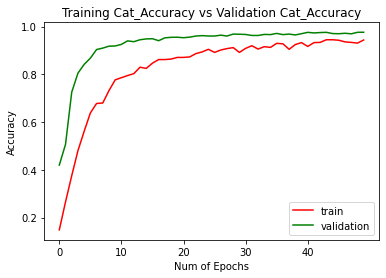

In [10]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])

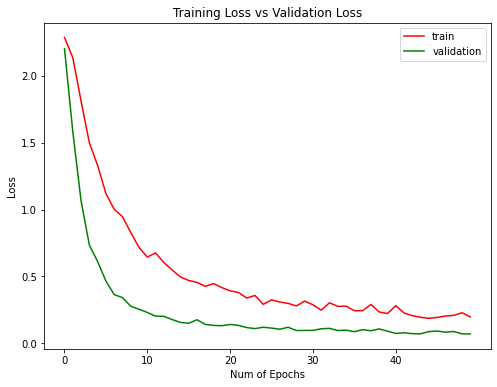

In [11]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

(1000, 28, 28)


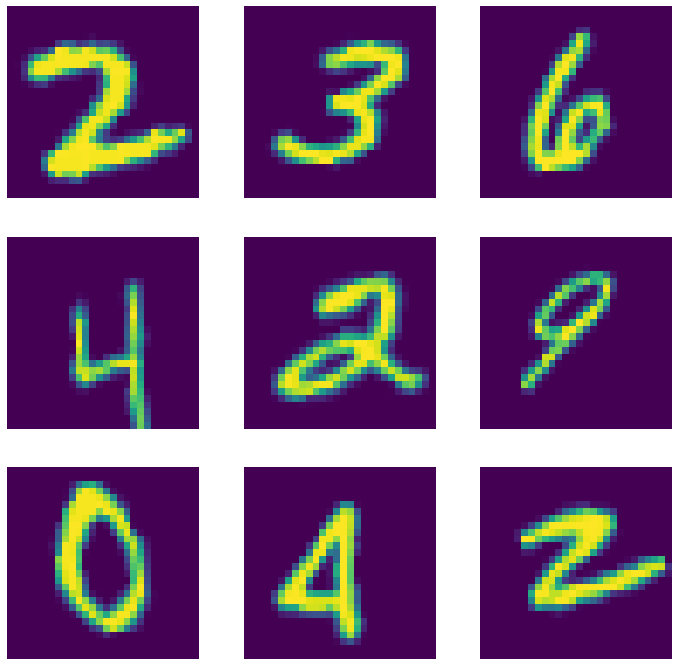

In [12]:
print(x_train.reshape((len(x_train),img_rows, img_cols)).shape)
# see example augmentation images
fig = plt.figure(figsize=(12, 12))
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
         plt.subplot(330 + 1 + i)
         plt.imshow(X_batch[i].reshape((img_rows, img_cols)))
         plt.axis('off')
    plt.show()
    break

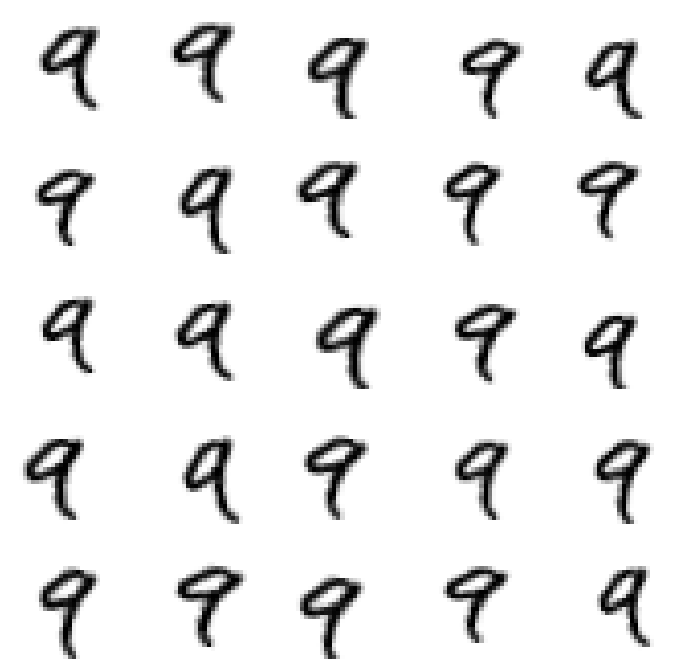

In [13]:
# see example augmentation images
fig = plt.figure(figsize=(12, 12))

for i in range(0, 25):
    for X_batch, y_batch in datagen.flow(x_train[4:6], y_train[4:6], batch_size=1, shuffle=False):
         plt.subplot(5,5,i+1)
         plt.imshow(X_batch[0].reshape((img_rows, img_cols)), cmap=plt.cm.binary, interpolation='nearest')
         plt.axis('off')
         break

plt.show()

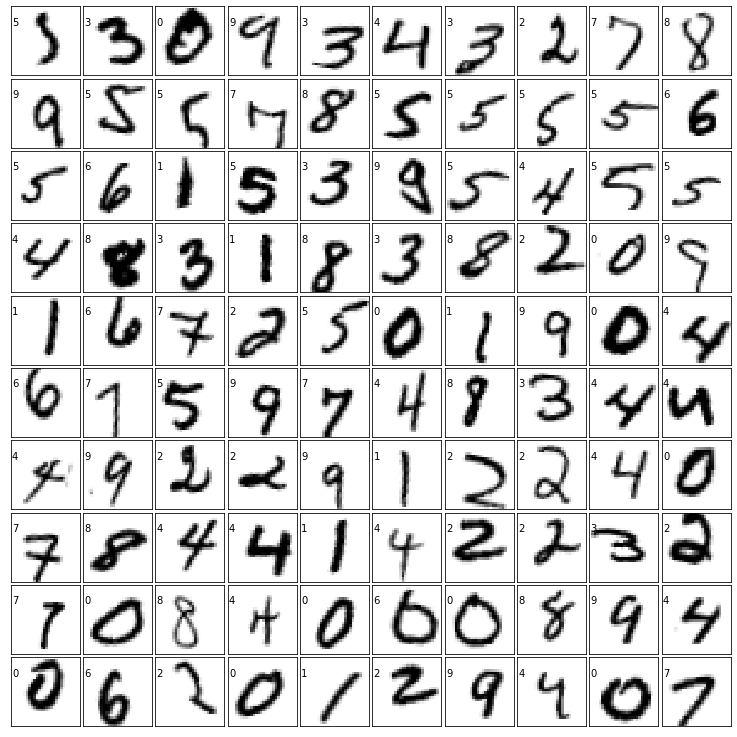

In [14]:
#visualize the digits
fig = plt.figure(figsize=(10, 10)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# generate augmented plot
X_train, Y_train = datagen.flow(x_train,y_train, batch_size=100).next()
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_train[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(np.argmax(Y_train[i])))

In [15]:
# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 99.30% , Test: 97.65% 


In [16]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

313/313 - 8s
[[ 974    0    2    0    0    0    1    1    2    0]
 [   0 1119    4    0    0    0    3    6    3    0]
 [   1    0 1023    3    0    0    0    3    2    0]
 [   0    0    1  991    0   11    0    2    5    0]
 [   1    1    1    0  948    0    8    0    0   23]
 [   0    1    0    3    0  875    5    1    6    1]
 [   6    3    0    0    0    3  943    0    3    0]
 [   0    1   24    2    1    0    0  996    0    4]
 [  26    1    5    2    2    2    4    0  926    6]
 [   5    2    0    5    6    8    1    8    4  970]]


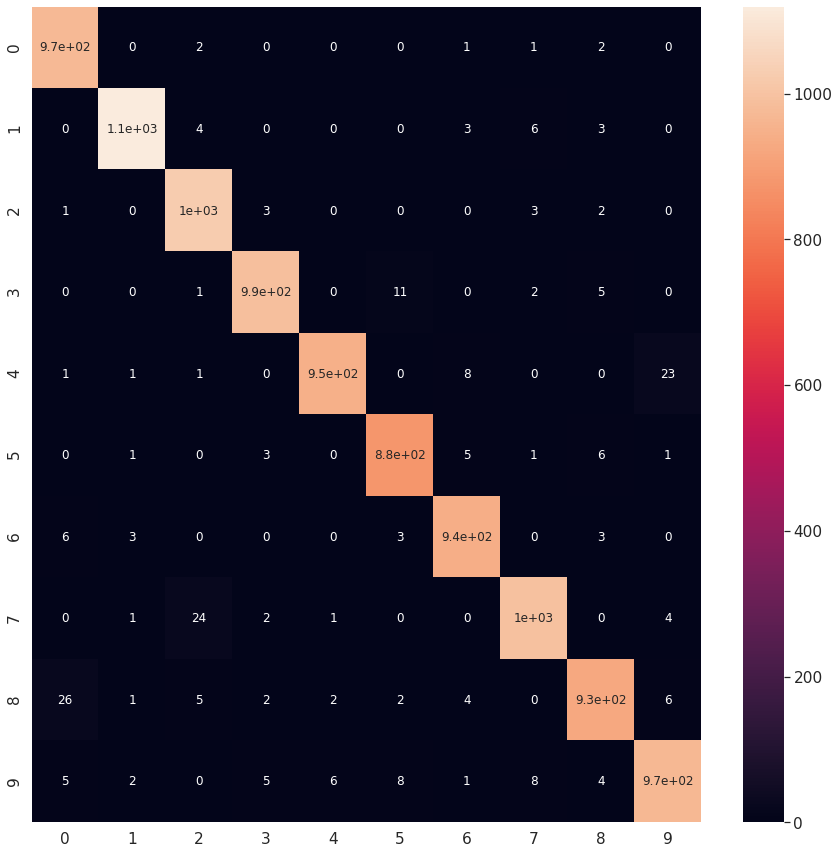

In [17]:
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

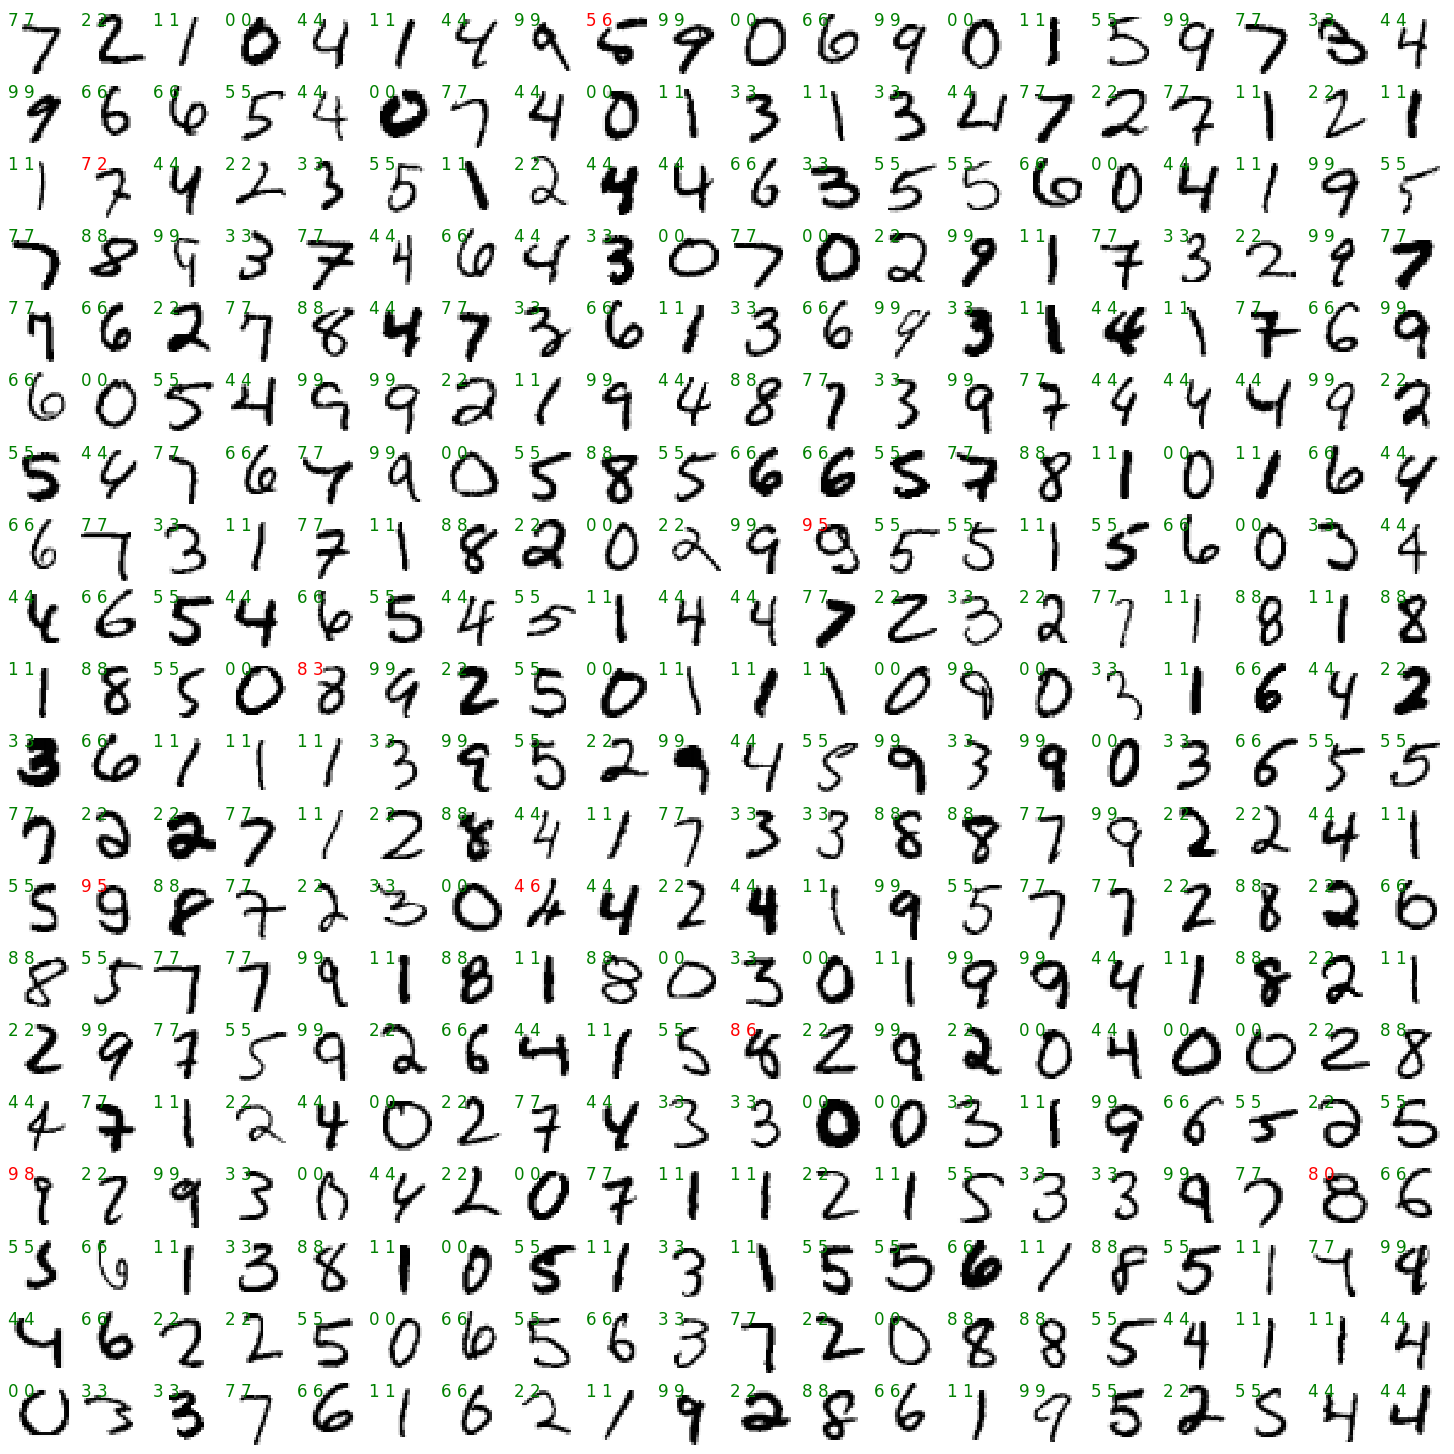

In [18]:
# use the model to predict the labels of the test data
predicted = model.predict(x_test)
expected = y_test0



# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if np.argmax(predicted[i]) == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='red')

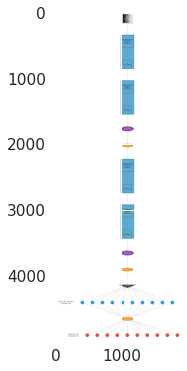

In [19]:
# Creates the graph.png file

! pip3 install keras-visualizer
from keras_visualizer import visualizer  

#create the graph.png image
visualizer(model=model, view=True, format='png', filename='graph')

#show the graph
import matplotlib.image as mpimg
img = mpimg.imread('graph.png')
imgplot = plt.imshow(img,)
plt.show()